<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



STATISTICABOSTON HOUSING AGENCIES

#### Import the required libraries we need for the lab.


In [11]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [13]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [14]:
boston_df=pd.read_csv(boston_url)

# Task 1: Become familiar with the dataset

In [15]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [16]:
boston_df=boston_df.drop(columns='Unnamed: 0')

In [17]:
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


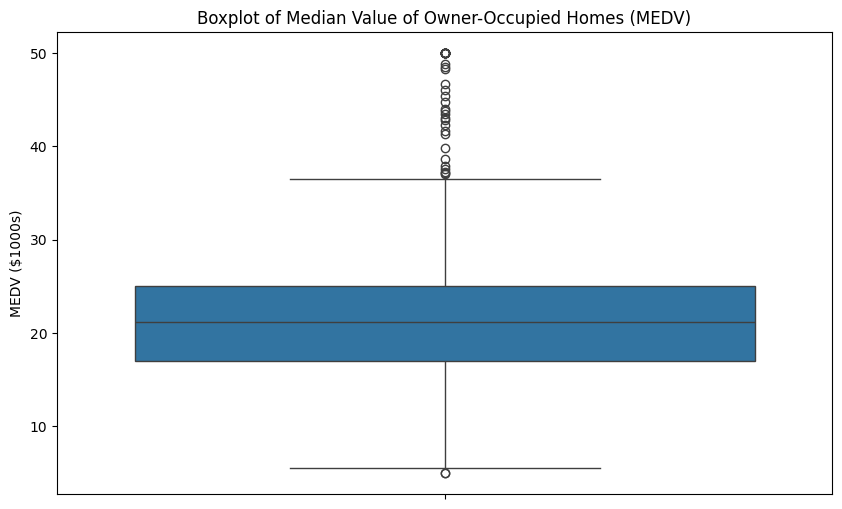

In [19]:
# Boxplot for MEDV
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV ($1000s)')
plt.show()

### Findings:

The boxplot will show the median value, interquartile range (IQR), and any potential outliers. Outliers may indicate properties with significantly higher values compared to others, and the spread of the data can help identify the overall distribution.

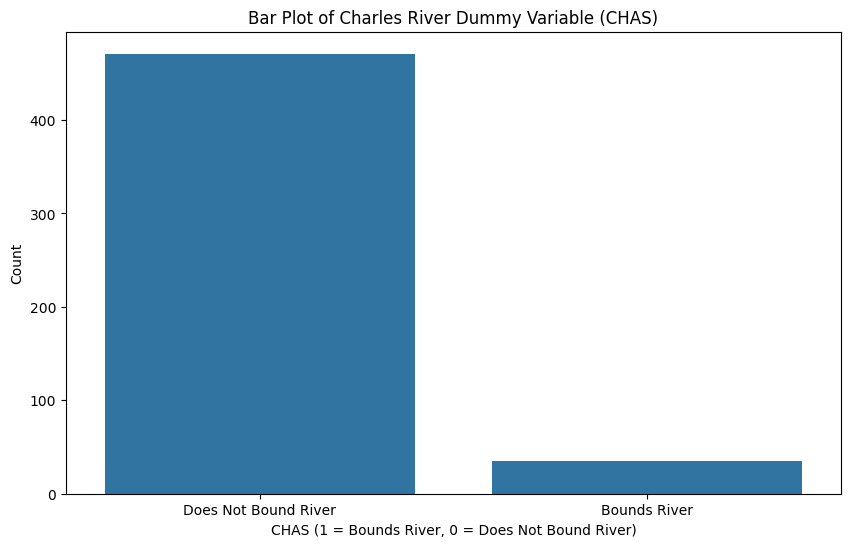

In [20]:
# Bar plot for CHAS variable
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Dummy Variable (CHAS)')
plt.xlabel('CHAS (1 = Bounds River, 0 = Does Not Bound River)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Does Not Bound River', 'Bounds River'])
plt.show()


### Findings:

This bar plot will show the counts of properties that either bound the Charles River or do not. A higher count for one category could indicate a preference or greater availability in certain areas.

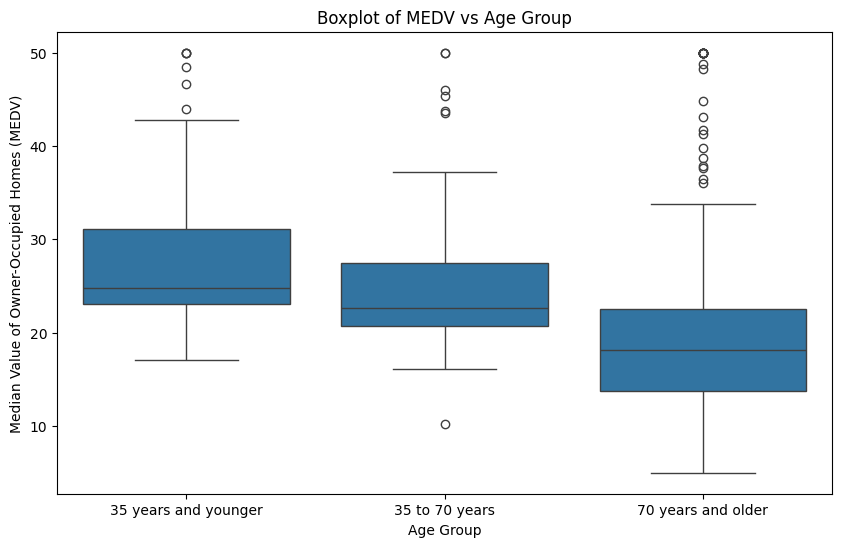

In [21]:
# Discretizing AGE variable
bins = [0, 35, 70, 100]
labels = ['35 years and younger', '35 to 70 years', '70 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Boxplot for MEDV vs AGE_GROUP
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.show()


### Findings:

This boxplot will allow you to compare the median home values across different age groups of the homes. It might reveal trends, such as older homes having a lower or higher median value compared to newer homes.

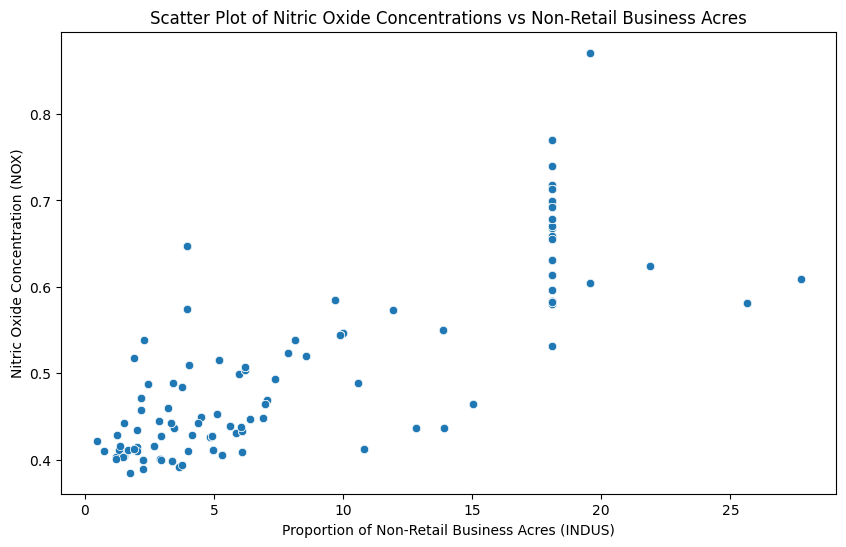

In [22]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()


### Findings:

The scatter plot will help visualize the relationship between NOX and INDUS. A positive or negative correlation could indicate that as the proportion of non-retail business acres increases or decreases, so does the concentration of nitric oxides, possibly due to pollution sources associated with industrial areas.

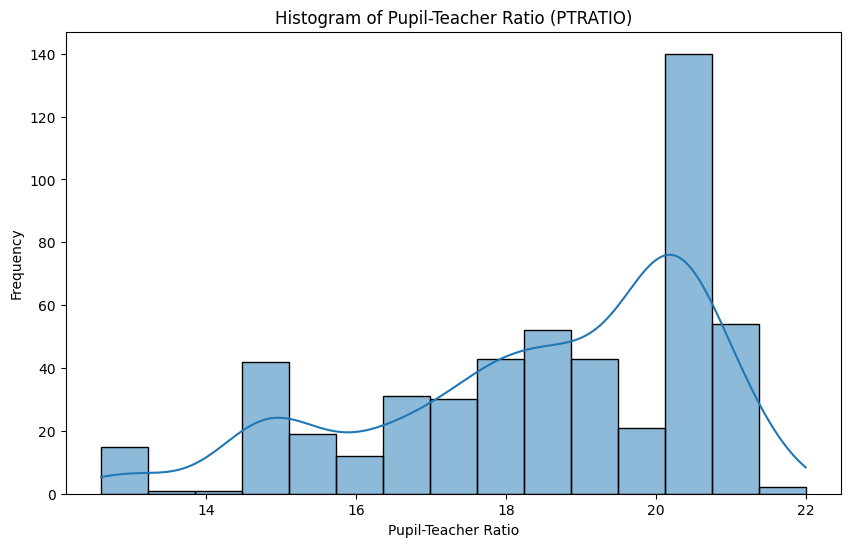

In [23]:
# Histogram for PTRATIO variable
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


### Findings:

The histogram will display the distribution of pupil-teacher ratios across the dataset. The shape of the distribution is normal and can give insights into the educational environment in the studied area.

In [26]:
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Bounded by Charles River
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Not bounded

# Perform T-test
t_stat, p_value = stats.ttest_ind(group1, group2)

alpha = 0.05
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


In [27]:
# Discretizing AGE variable into three groups
bins = [0, 35, 70, 100]
labels = ['35 years and younger', '35 to 70 years', '70 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Perform ANOVA
anova_results = stats.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '35 to 70 years']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']
)

print(f"F-statistic: {anova_results.statistic}, P-value: {anova_results.pvalue}")


F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


In [28]:
# Calculate Pearson correlation
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Correlation Coefficient: {correlation_coefficient}, P-value: {p_value}")


Correlation Coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98


In [29]:
import statsmodels.api as sm

# Define the independent variable (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        16:13:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0